#### Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data
energy_data = pd.read_csv("energySoftware.csv")

# 1. Plot the distribution of CPU for each test type

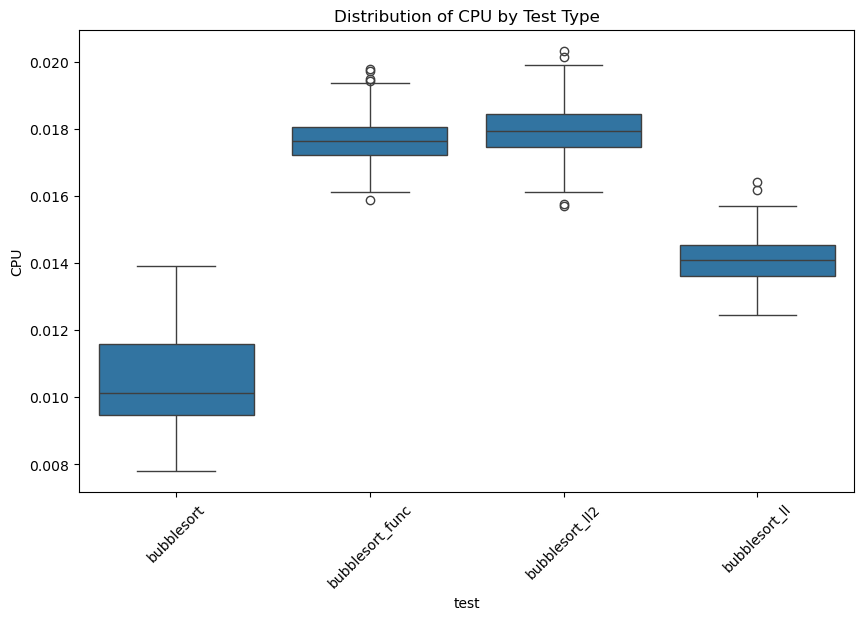

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='test', y='CPU', data=energy_data)
plt.title('Distribution of CPU by Test Type')
plt.xticks(rotation=45)
plt.show()

# 2. Difference in CPU between bubblesort and bubblesort_ll

First, let's check for normality using histograms to determine which statistical test to use.

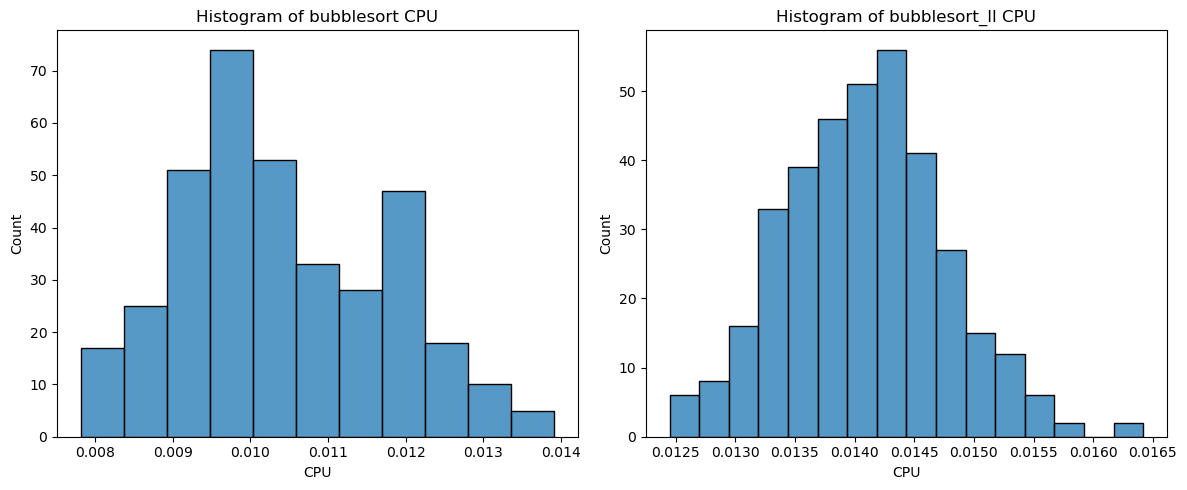

Mann-Whitney U test statistic: 645.5
p-value: 3.79156286604797e-117

Student's t-test results:
t-statistic: -47.4605


In [19]:
# Extract the two groups
bubblesort_cpu = energy_data[energy_data['test'] == 'bubblesort']['CPU']
bubblesort_ll_cpu = energy_data[energy_data['test'] == 'bubblesort_ll']['CPU']

# Visual normality check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Changed to 1 row, 2 columns
# Perform Student's t-test
t_stat, t_pvalue = stats.ttest_ind(bubblesort_cpu, bubblesort_ll_cpu)


# Histograms
sns.histplot(data=bubblesort_cpu, ax=ax1)
ax1.set_title('Histogram of bubblesort CPU')
sns.histplot(data=bubblesort_ll_cpu, ax=ax2)
ax2.set_title('Histogram of bubblesort_ll CPU')

plt.tight_layout()
plt.show()

# Perform Mann-Whitney U test (non-parametric test)
stat, pvalue = stats.mannwhitneyu(bubblesort_cpu, bubblesort_ll_cpu, alternative='two-sided')
print(f'Mann-Whitney U test statistic: {stat}')
print(f'p-value: {pvalue}')
print("\nStudent's t-test results:")
print(f't-statistic: {t_stat:.4f}')

# 3. Difference in CPU between bubblesort_func and bubblesort_ll2

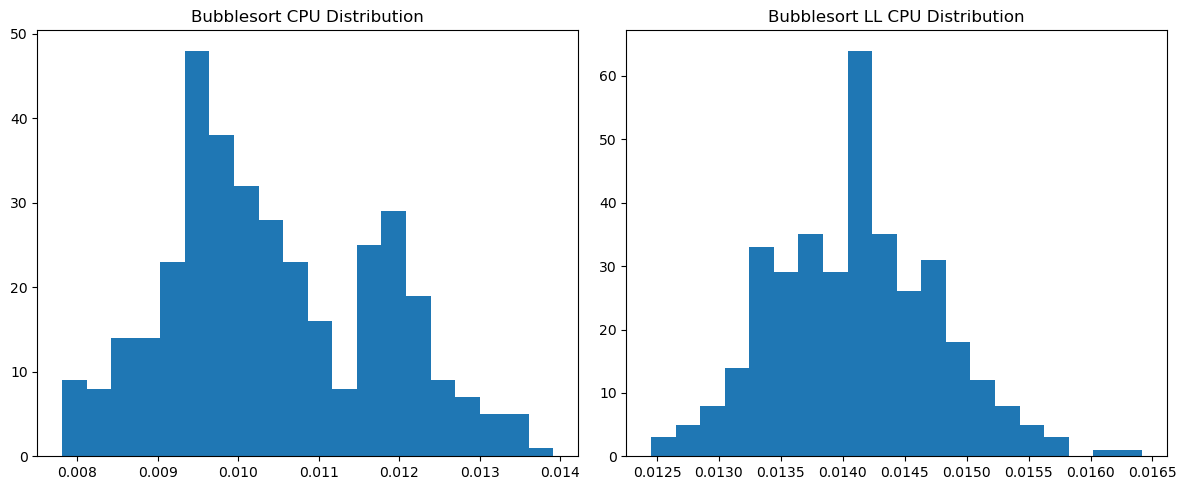

Mann-Whitney U test statistic: 50920.5
p-value: 6.502153741813431e-07

Student's t-test results:
t-statistic: -4.6923


In [20]:
# Extract the two groups
bubblesort_cpu = energy_data[energy_data['test'] == 'bubblesort']['CPU']
bubblesort_ll_cpu = energy_data[energy_data['test'] == 'bubblesort_ll']['CPU']


# Create histograms only (no Q-Q plots)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(bubblesort_cpu, bins=20)
plt.title('Bubblesort CPU Distribution')

plt.subplot(1, 2, 2)
plt.hist(bubblesort_ll_cpu, bins=20)
plt.title('Bubblesort LL CPU Distribution')

plt.tight_layout()
plt.show()

# Perform Mann-Whitney U test
stat, pvalue = stats.mannwhitneyu(bubblesort_func_cpu, bubblesort_ll2_cpu, alternative='two-sided')
t_stat, t_pvalue = stats.ttest_ind(bubblesort_func_cpu, bubblesort_ll2_cpu)

print(f'Mann-Whitney U test statistic: {stat}')
print(f'p-value: {pvalue}')
print("\nStudent's t-test results:")
print(f't-statistic: {t_stat:.4f}')


# 4. Difference in time between bubblesort and bubblesort_ll

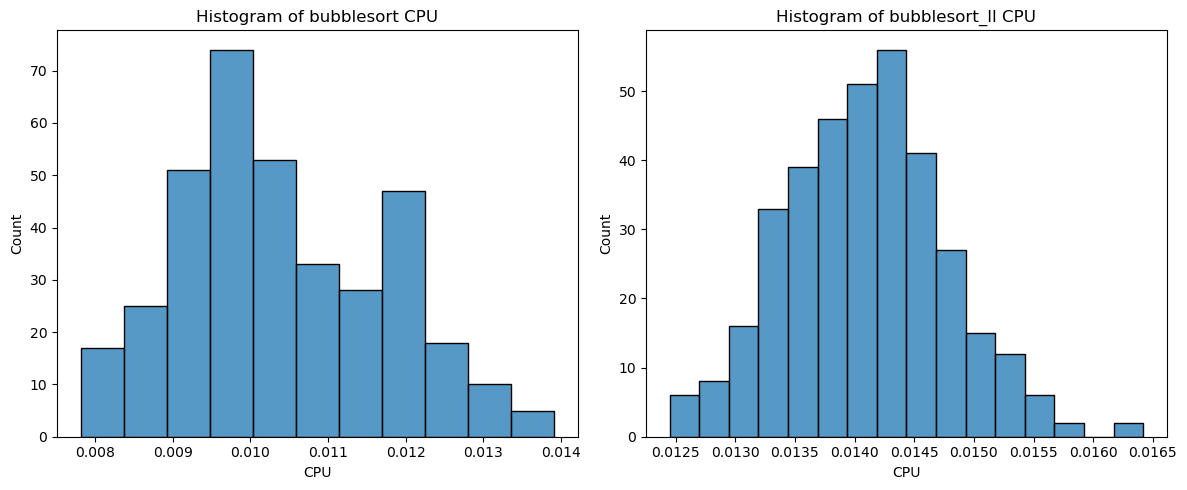

Mann-Whitney U test statistic: 645.5
p-value: 3.79156286604797e-117

Student's t-test results:
t-statistic: -47.4605


In [21]:
# Extract the two groups
bubblesort_cpu = energy_data[energy_data['test'] == 'bubblesort']['CPU']
bubblesort_ll_cpu = energy_data[energy_data['test'] == 'bubblesort_ll']['CPU']



# Visual normality check
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Changed to 1 row, 2 columns

# Histograms
sns.histplot(data=bubblesort_cpu, ax=axes[0])
axes[0].set_title('Histogram of bubblesort CPU')
sns.histplot(data=bubblesort_ll_cpu, ax=axes[1])
axes[1].set_title('Histogram of bubblesort_ll CPU')

plt.tight_layout()
plt.show()

# Perform Mann-Whitney U test
stat, pvalue = stats.mannwhitneyu(bubblesort_cpu, bubblesort_ll_cpu, alternative='two-sided')
t_stat, t_pvalue = stats.ttest_ind(bubblesort_cpu, bubblesort_ll_cpu)

print(f'Mann-Whitney U test statistic: {stat}')
print(f'p-value: {pvalue}')
print("\nStudent's t-test results:")
print(f't-statistic: {t_stat:.4f}')


# 5. ANOVA test for CPU across groups

In [16]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    energy_data[energy_data['test'] == 'bubblesort']['CPU'],
    energy_data[energy_data['test'] == 'bubblesort_ll']['CPU'],
    energy_data[energy_data['test'] == 'bubblesort_func']['CPU'],
    energy_data[energy_data['test'] == 'bubblesort_ll2']['CPU']
)

print(f'One-way ANOVA F-statistic: {f_stat}')
print(f'p-value: {p_value}')



One-way ANOVA F-statistic: 5641.937696029289
p-value: 0.0


# 6. ANOVA test for time across groups

In [17]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    energy_data[energy_data['test'] == 'bubblesort']['time'],
    energy_data[energy_data['test'] == 'bubblesort_ll']['time'],
    energy_data[energy_data['test'] == 'bubblesort_func']['time'],
    energy_data[energy_data['test'] == 'bubblesort_ll2']['time']
)

print(f'One-way ANOVA F-statistic: {f_stat}')
print(f'p-value: {p_value}')


One-way ANOVA F-statistic: 2556.3329354127823
p-value: 0.0
